In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading csv files
bookings = pd.read_csv("/content/Bookings.csv")
sessions = pd.read_csv("/content/Sessions.csv")

In [ ]:
#Find the number of distinct bookings,sessions,and searches from the given datasets
num_distinct_bookings = bookings['booking_id'].nunique()
num_distinct_sessions = sessions['session_id'].nunique()
num_distinct_searches = sessions['search_id'].nunique()

print(f"Distinct Bookings: {num_distinct_bookings}")
print(f"Distinct Sessions: {num_distinct_sessions}")
print(f"Distinct Searches: {num_distinct_searches}")

Distinct Bookings: 339
Distinct Sessions: 331
Distinct Searches: 1360


In [ ]:
#Sessions with More than One Bookings: incorrect
# Count number of bookings per session
bookings_per_session = sessions.groupby("session_id")['booking_id'].nunique()
multi_booking_sessions = (bookings_per_session > 1).sum()
print(f"Sessions with more than one booking: {multi_booking_sessions}")

Sessions with more than one booking: 10


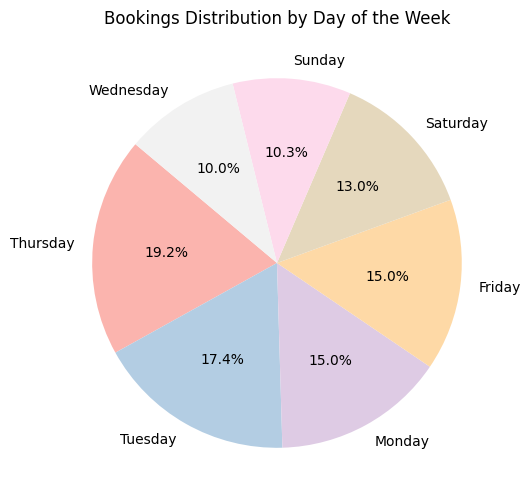

In [ ]:
#Days of the Week with Highest Number of Bookings
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])
bookings['day_of_week'] = bookings['booking_time'].dt.day_name()
booking_counts = bookings['day_of_week'].value_counts()

#Ploting pie chart
plt.figure(figsize=(8, 6))
booking_counts.plot.pie(autopct='%1.1f%%', startangle=140, cmap='Pastel1')
plt.title("Bookings Distribution by Day of the Week")
plt.ylabel("")
plt.show()

In [ ]:
# 4. Total bookings & Gross Booking Value per service
service_stats = bookings.groupby('service_name').agg({'booking_id':'count', 'INR_Amount':'sum'})
service_stats.rename(columns={'booking_id': 'Total Bookings', 'INR_Amount': 'Total Revenue (INR)'}, inplace=True)
print(service_stats)

              Total Bookings  Total Revenue (INR)
service_name                                     
GOIBIBO                  186           5897637.97
MMT                       48            665669.08
YATRA                    105           3378702.13


In [ ]:
# 5. Most booked route for customers with multiple bookings
customer_booking_counts = bookings.groupby('customer_id')['booking_id'].count()
multi_booking_customers = customer_booking_counts[customer_booking_counts > 1].index
multi_booking_routes = bookings[bookings['customer_id'].isin(multi_booking_customers)]
popular_route = multi_booking_routes.groupby(['from_city', 'to_city']).size().idxmax()
print(f"Most booked route by repeat customers: {popular_route}")

Most booked route by repeat customers: ('Gurgaon', 'Roissy-en-France')


In [ ]:
 # 6. Top 3 advance booking cities
departure_counts = bookings['from_city'].value_counts()
cities_with_min_departures = departure_counts[departure_counts >= 5].index

print(departure_counts)

filtered_bookings = bookings[bookings['from_city'].isin(cities_with_min_departures)]

average_days_to_departure = (
    filtered_bookings.groupby('from_city')['days_to_departure']
    .mean()
    .reset_index()
)

top_departure_cities = (
    average_days_to_departure
    .sort_values(by='days_to_departure', ascending=False)
    .head(3)
)

print("Top 3 departure cities where customers book mostly in advance:")
print(top_departure_cities)



from_city
Gurgaon               136
Mumbai                 34
Delhi                  29
Devanhalli             24
Rāja Sānsi             17
Chennai                16
Ahmedabad               8
New Delhi               7
Madhyamgram             6
Bālāpur                 6
Kochi                   4
Surat                   4
Pune                    4
Thiruvananthapuram      4
Jaipur                  4
Varanasi                4
Hyderabad               4
Chicalim                2
Bhubaneswar             2
Kolkata                 2
Patna                   2
Bangalore               2
Angamāli                2
Durlaga                 2
Ranchi                  1
Mohali                  1
Lucknow                 1
Agartala                1
Ferokh                  1
Bikaner                 1
Dharamsala              1
Jammu                   1
Hyderābād               1
Gannavaram              1
Thrissur                1
Barelā                  1
Indore                  1
Nagpur                  1
Na

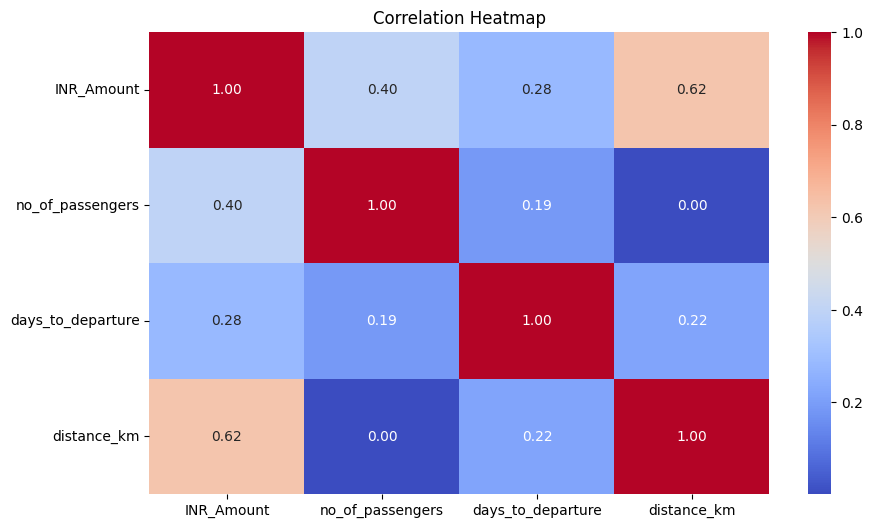

In [ ]:
# 7. Heatmap of correlations
numerical_cols = bookings.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# 8. Most used device per service
device_per_service = bookings.groupby('service_name')['device_type_used'].agg(lambda x: x.value_counts().idxmax())
print("Most used device per service:\n", device_per_service)

Most used device per service:
 service_name
GOIBIBO        IOS
MMT        Desktop
YATRA      Desktop
Name: device_type_used, dtype: object


<ipython-input-25-9ade171bc51a>:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bookings['year_quarter'] = bookings['booking_time'].dt.to_period('Q')


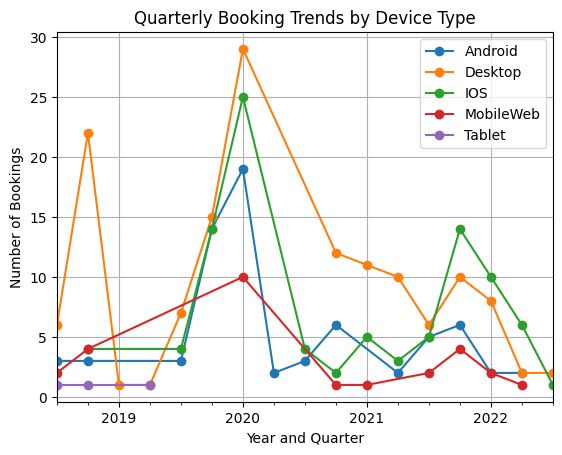

In [ ]:
# 9: Trends in Bookings by Device Type (Quarterly)
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])
bookings['year_quarter'] = bookings['booking_time'].dt.to_period('Q')

for device_type, data in bookings.groupby('device_type_used'):
    bookings_per_quarter = data.groupby('year_quarter').size()
    bookings_per_quarter.plot(label=device_type, marker='o')

plt.xlabel('Year and Quarter')
plt.ylabel('Number of Bookings')
plt.legend()
plt.title('Quarterly Booking Trends by Device Type')
plt.grid(True)
plt.show()



Converted Bookings Data:
               booking_time
0 2020-02-05 16:12:08+00:00
1 2018-11-21 08:21:47+00:00
2 2019-12-16 22:54:58+00:00
3 2021-10-29 12:25:38+00:00
4 2020-08-11 16:09:10+00:00

Converted Sessions Data:
                       search_time
0 2020-01-21 21:35:38.910000+00:00
1 2020-01-21 21:37:37.697000+00:00
2 2020-01-21 21:36:11.392000+00:00
3 2020-01-21 21:16:07.685000+00:00
4 2020-01-21 21:34:55.673000+00:00
monthly_obsr       month      oBSR
0   2018-09  0.363636
1   2018-10  0.087379
2   2018-11  0.217391
3   2018-12  0.171429
4   2019-01  0.200000
5   2019-06  1.000000
6   2019-07  0.208333
7   2019-08  0.285714
8   2019-09  0.280000
9   2019-10  0.214286
10  2019-11  0.258065
11  2019-12  0.213115
12  2020-01  0.200000
13  2020-02  0.283582
14  2020-03  0.255319
15  2020-05       NaN
16  2020-06       NaN
17  2020-07       NaN
18  2020-08       NaN
19  2020-09       NaN
20  2020-10       NaN
21  2020-11       NaN
22  2020-12       NaN
23  2021-01       NaN
24  202

<ipython-input-30-571225595e53>:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bookings['month'] = bookings['booking_time'].dt.to_period('M')
<ipython-input-30-571225595e53>:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  sessions['month'] = sessions['search_time'].dt.to_period('M')


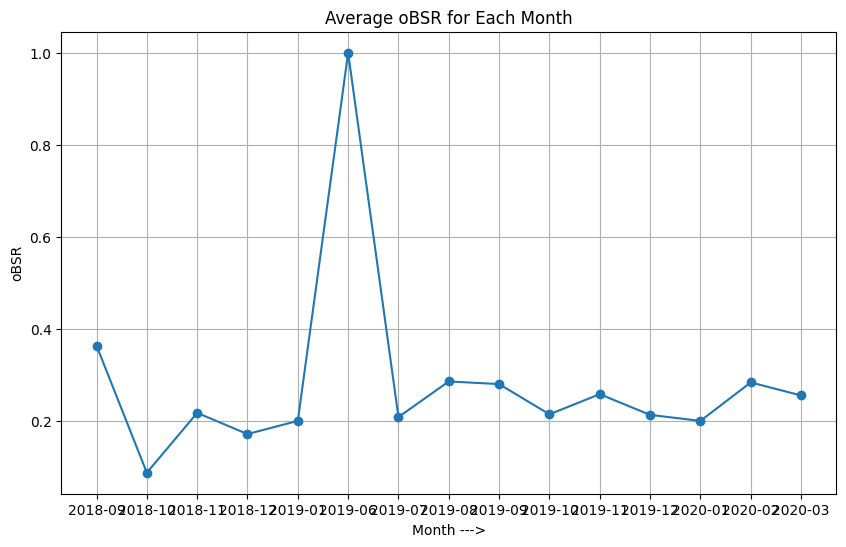

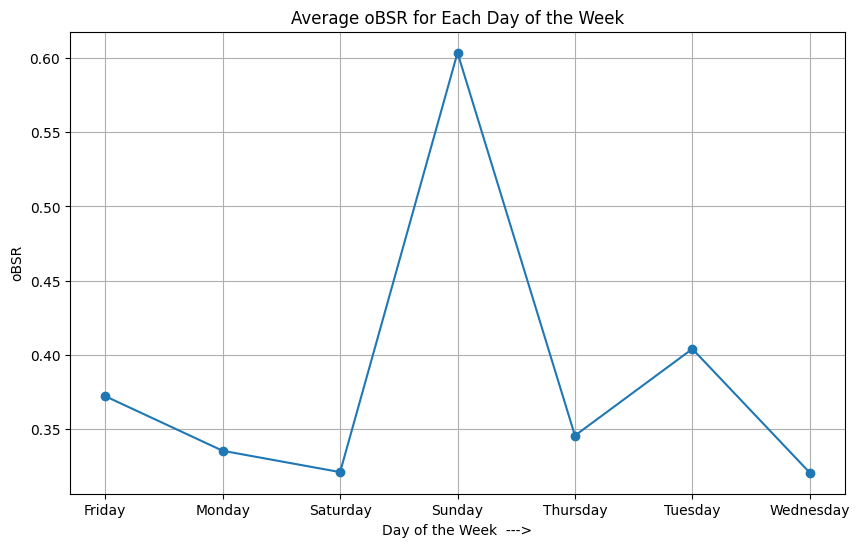

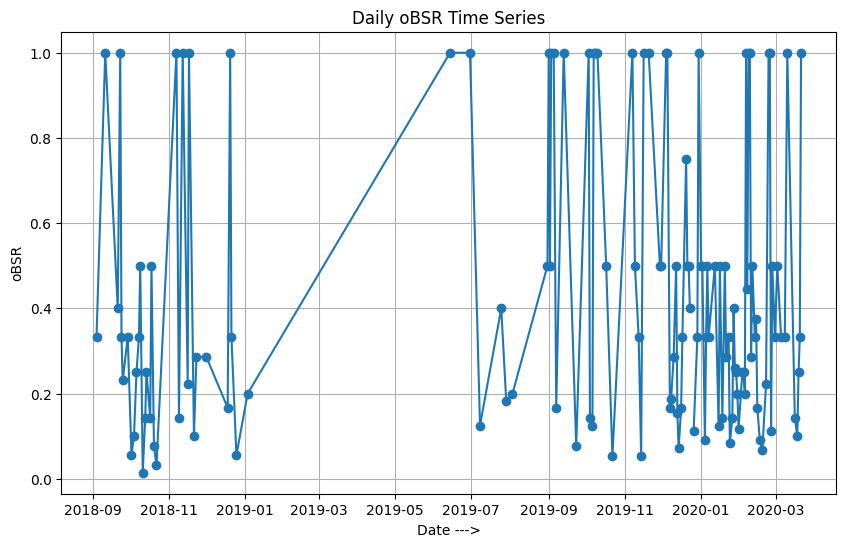

In [ ]:
#Question 10:

bookings['booking_time'] = pd.to_datetime(bookings['booking_time'], errors='coerce')
sessions['search_time'] = pd.to_datetime(sessions['search_time'], errors='coerce')

print("\nConverted Bookings Data:")
print(bookings[['booking_time']].head())
print("\nConverted Sessions Data:")
print(sessions[['search_time']].head())

bookings['month'] = bookings['booking_time'].dt.to_period('M')
sessions['month'] = sessions['search_time'].dt.to_period('M')

bookings['day_of_week'] = bookings['booking_time'].dt.day_name()
sessions['day_of_week'] = sessions['search_time'].dt.day_name()

bookings['date'] = bookings['booking_time'].dt.date
sessions['date'] = sessions['search_time'].dt.date

monthly_bookings = bookings.groupby('month').size()
monthly_searches = sessions.groupby('month').size()
monthly_obsr = (monthly_bookings / monthly_searches).reset_index(name='oBSR')
print ("monthly_obsr", monthly_obsr)

print("\nMonthly oBSR Data:")
print(monthly_obsr)

weekly_bookings = bookings.groupby('day_of_week').size()
weekly_searches = sessions.groupby('day_of_week').size()
weekly_obsr = (weekly_bookings / weekly_searches).reset_index(name='oBSR')

print("\nWeekly oBSR Data:")
print(weekly_obsr)

daily_bookings = bookings.groupby('date').size()
daily_searches = sessions.groupby('date').size()
daily_obsr = (daily_bookings / daily_searches).reset_index(name='oBSR')

print("\nDaily oBSR Data:")
print(daily_obsr)

# Plot monthly oBSR
plt.figure(figsize=(10, 6))
plt.plot(monthly_obsr['month'].astype(str), monthly_obsr['oBSR'], marker='o')
plt.title('Average oBSR for Each Month')
plt.xlabel('Month --->')
plt.ylabel('oBSR')
plt.grid(True)
plt.show()

# Plot weekly oBSR
plt.figure(figsize=(10, 6))
plt.plot(weekly_obsr['day_of_week'], weekly_obsr['oBSR'], marker='o')
plt.title('Average oBSR for Each Day of the Week')
plt.xlabel('Day of the Week  --->')
plt.ylabel('oBSR')
plt.grid(True)
plt.show()

# Plot daily oBSR time series
plt.figure(figsize=(10, 6))
plt.plot(daily_obsr['date'], daily_obsr['oBSR'], marker='o')
plt.title('Daily oBSR Time Series')
plt.xlabel('Date --->')
plt.ylabel('oBSR')
plt.grid(True)
plt.show()